In [1]:


import numpy as np
import pandas as pd
import os
import random
from tqdm import tqdm
from textwrap import wrap

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

from torchvision.models import vit_b_16



/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:




f = open('../input/ip02-dataset/classes.txt')
label = []
name = []
for line in f.readlines():
    label.append(int(line.split()[0]))
    name.append(' '.join(line.split()[1:]))
classes = pd.DataFrame([label, name]).T
classes.columns = ['label','name']
classes




label                        name
0       1            rice leaf roller
1       2       rice leaf caterpillar
2       3           paddy stem maggot
3       4          asiatic rice borer
4       5           yellow rice borer
..    ...                         ...
97     98        Chlumetia transversa
98     99  Mango flat beak leafhopper
99    100  Rhytidodera bowrinii white
100   101       Sternochetus frigidus
101   102                Cicadellidae

[102 rows x 2 columns]

In [3]:

train_df = pd.read_csv('../input/ip02-dataset/train.txt',sep=' ',header=None, engine='python')
train_df.columns = ['image_path','label']

test_df = pd.read_csv('../input/ip02-dataset/test.txt',sep=' ',header=None, engine='python')
test_df.columns = ['image_path','label']

val_df = pd.read_csv('../input/ip02-dataset/val.txt',sep=' ',header=None, engine='python')
val_df.columns = ['image_path','label']

train_df.head()



image_path  label
0  00002.jpg      0
1  00003.jpg      0
2  00005.jpg      0
3  00006.jpg      0
4  00008.jpg      0

In [4]:


TRAIN_DIR = '../input/ip02-dataset/classification/train'
TEST_DIR = '../input/ip02-dataset/classification/test'
VAL_DIR = '../input/ip02-dataset/classification/val'
LR = 2e-5
BATCH_SIZE = 8
EPOCH = 2

device = torch.device('cuda')



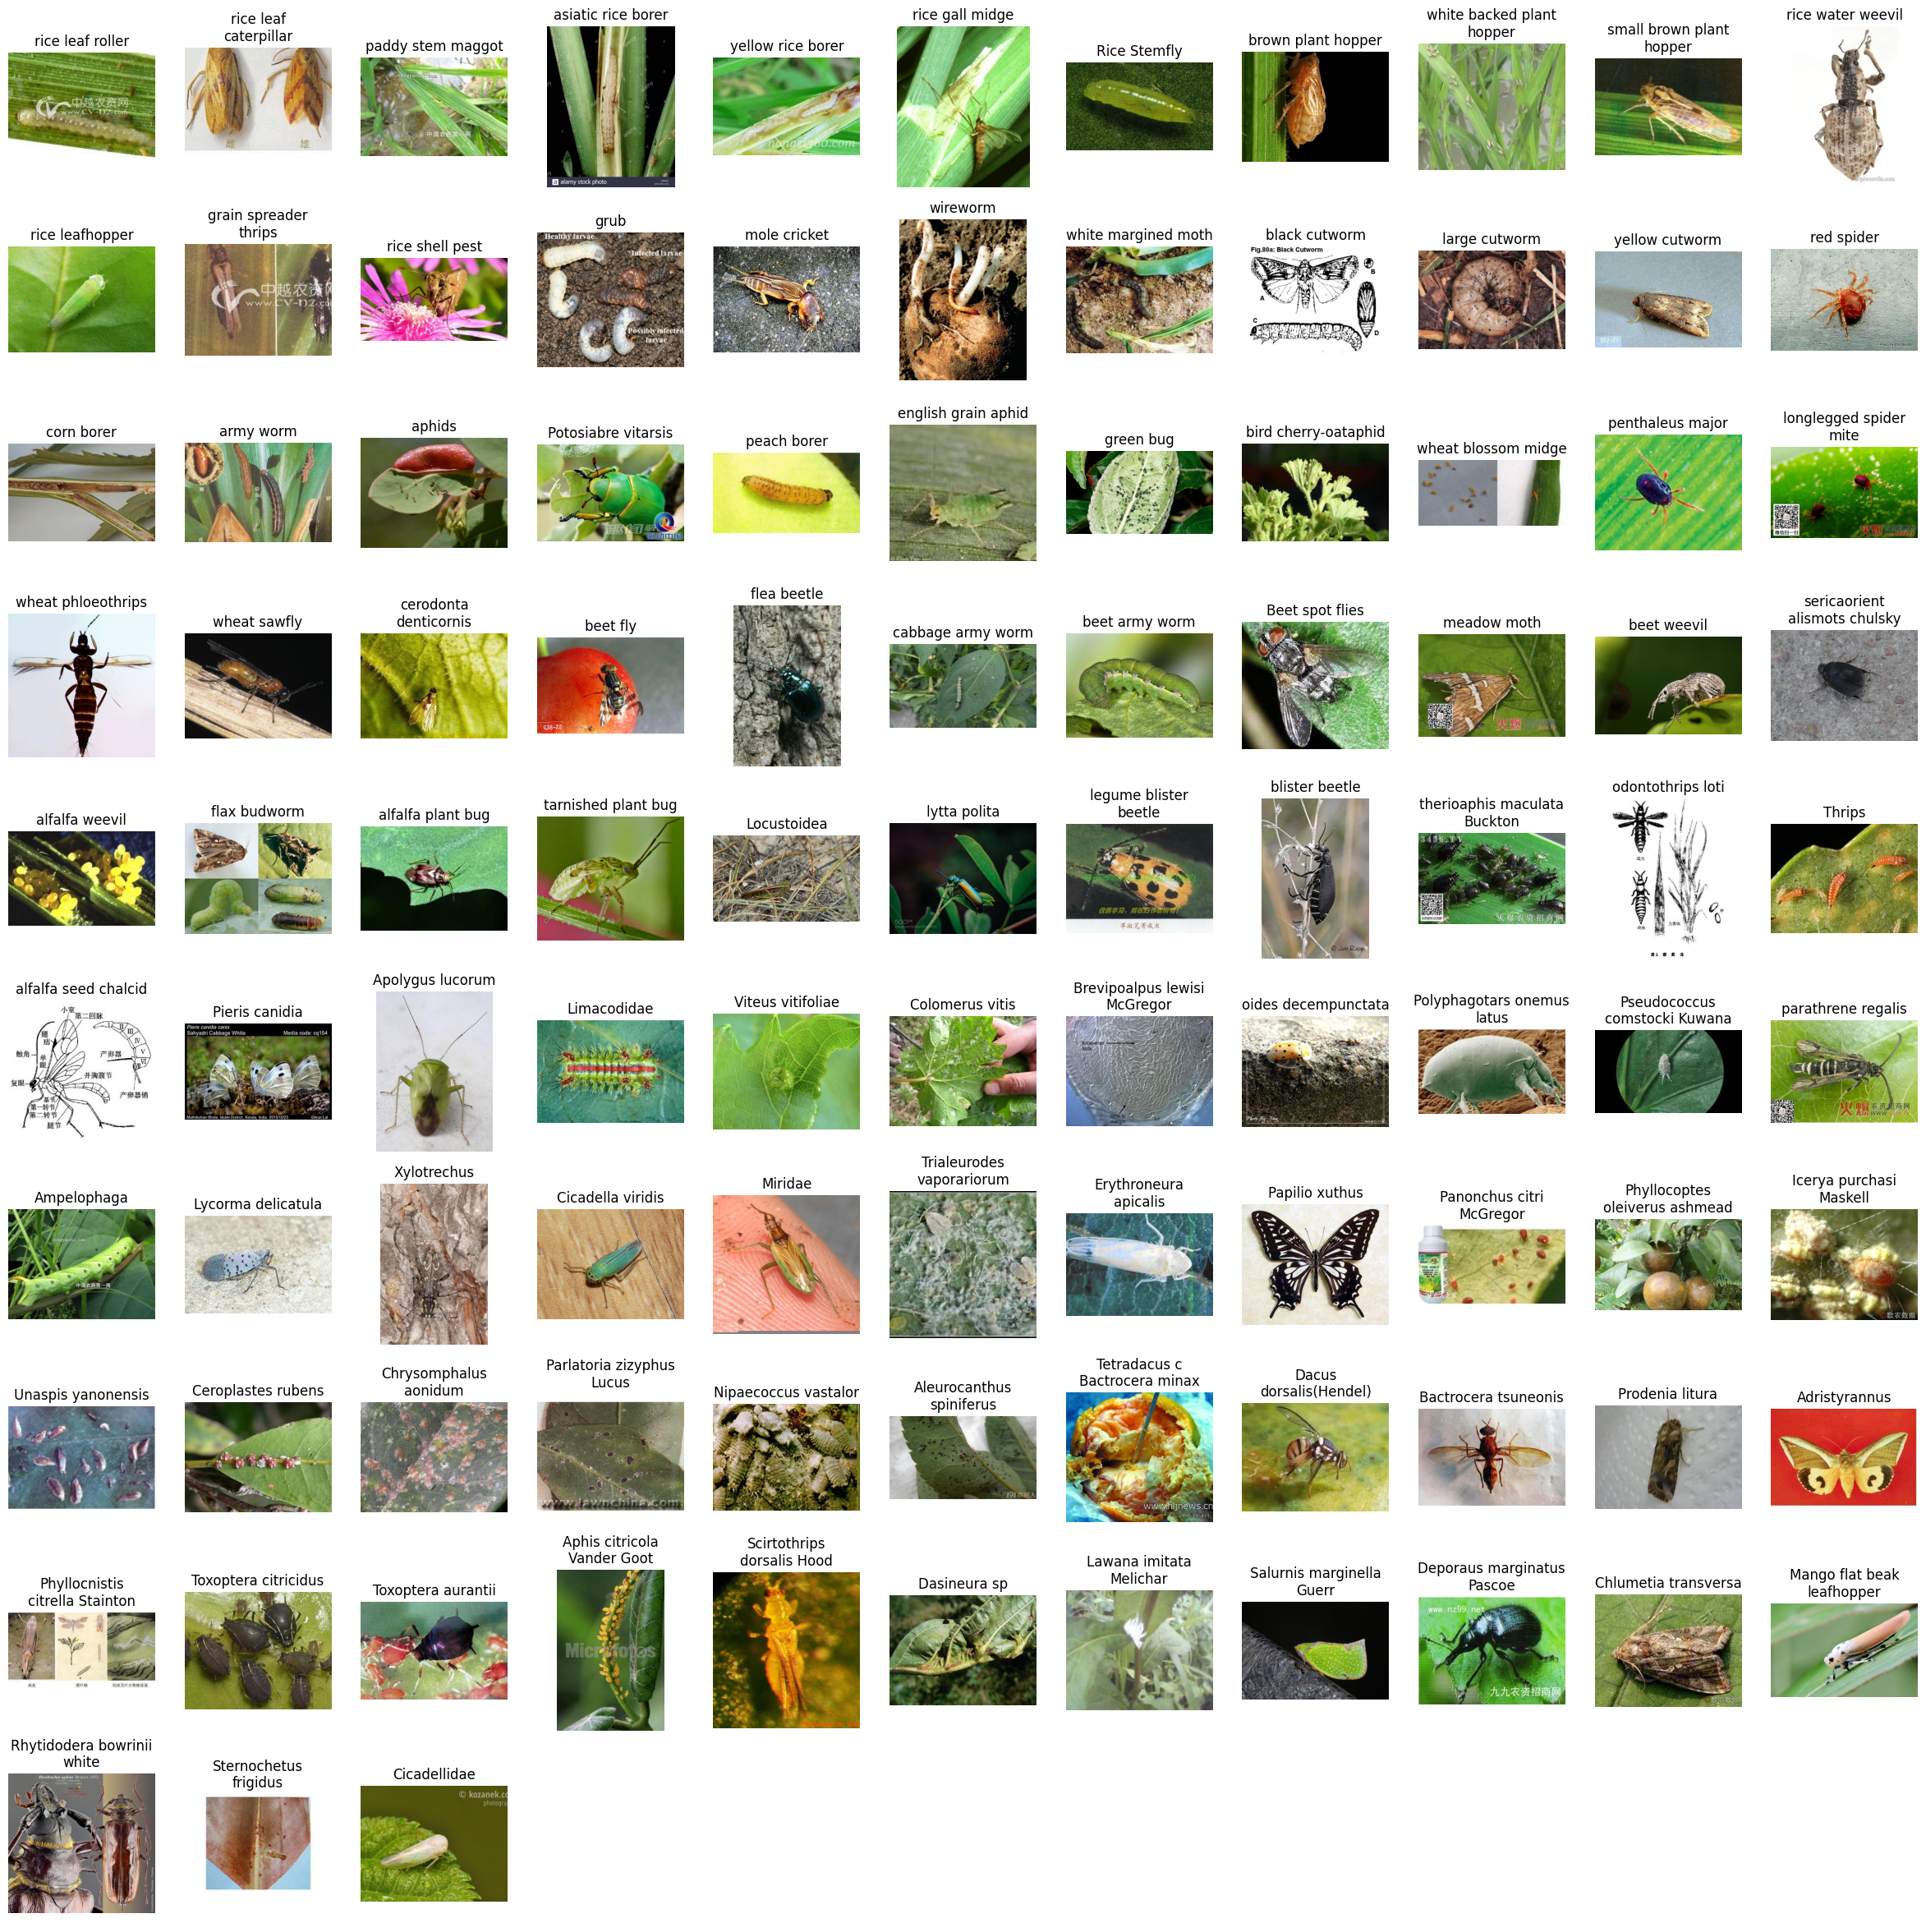

In [5]:


fig, axs = plt.subplots(10,11,figsize=(30,30))
images = []
for i in classes.label:
    random_img = random.choice(train_df[train_df.label==i-1].image_path.values)
    label = classes.name[i-1]
    img = plt.imread(os.path.join(TRAIN_DIR,str(i-1),random_img))
    images.append(img)

[ax.imshow(image) for image,ax in zip(images,axs.ravel())]
[ax.set_title("\n".join(wrap(label,20))) for label,ax in zip(list(classes.name),axs.ravel())]
[ax.set_axis_off() for ax in axs.ravel()]
plt.show()





# Vision Transformer Implementation



Epoch 1/10


100%|██████████| 939/939 [00:47<00:00, 19.77it/s]


Train Loss: 0.3100, Train Acc: 0.4500
Val Loss: 0.2180, Val Acc: 0.5497
Epoch 2/10


100%|██████████| 939/939 [00:47<00:00, 19.82it/s]


Train Loss: 0.1698, Train Acc: 0.6300
Val Loss: 0.1851, Val Acc: 0.6023
Epoch 3/10


100%|██████████| 939/939 [00:47<00:00, 19.81it/s]


Train Loss: 0.1159, Train Acc: 0.7122
Val Loss: 0.1683, Val Acc: 0.6336
Epoch 4/10


100%|██████████| 939/939 [00:47<00:00, 19.82it/s]


Train Loss: 0.0815, Train Acc: 0.7787
Val Loss: 0.1590, Val Acc: 0.6549
Epoch 5/10


100%|██████████| 939/939 [00:47<00:00, 19.84it/s]


Train Loss: 0.0591, Train Acc: 0.8259
Val Loss: 0.1581, Val Acc: 0.6716
Epoch 6/10


100%|██████████| 939/939 [00:47<00:00, 19.93it/s]


Train Loss: 0.0420, Train Acc: 0.8649
Val Loss: 0.1690, Val Acc: 0.6616
Epoch 7/10


100%|██████████| 939/939 [00:47<00:00, 19.85it/s]


Train Loss: 0.0329, Train Acc: 0.8923
Val Loss: 0.1633, Val Acc: 0.6777
Epoch 8/10


100%|██████████| 939/939 [00:47<00:00, 19.86it/s]


Train Loss: 0.0271, Train Acc: 0.9089
Val Loss: 0.1757, Val Acc: 0.6704
Epoch 9/10


100%|██████████| 939/939 [00:47<00:00, 19.90it/s]


Train Loss: 0.0226, Train Acc: 0.9235
Val Loss: 0.1780, Val Acc: 0.6705
Epoch 10/10


100%|██████████| 939/939 [00:47<00:00, 19.88it/s]


Train Loss: 0.0194, Train Acc: 0.9345
Val Loss: 0.2006, Val Acc: 0.6570


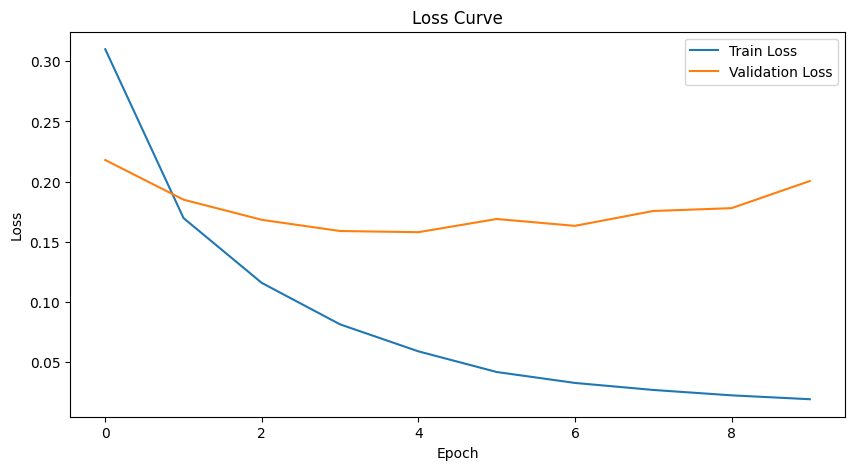

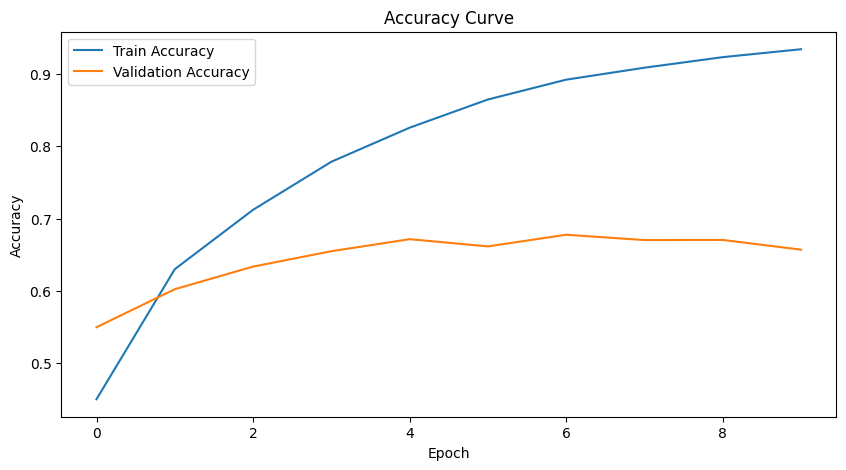

Precision: 0.6185, Recall: 0.6262, F1 Score: 0.6041
              precision    recall  f1-score   support

     Class 0       0.70      0.81      0.75       111
     Class 1       0.40      0.38      0.39        48
     Class 2       0.48      0.54      0.51        26
     Class 3       0.65      0.57      0.61       106
     Class 4       0.78      0.56      0.65        50
     Class 5       0.59      0.76      0.67        51
     Class 6       0.44      0.57      0.49        37
     Class 7       0.36      0.33      0.34        83
     Class 8       0.46      0.59      0.51        90
     Class 9       0.30      0.46      0.37        56
    Class 10       0.75      0.60      0.67        86
    Class 11       0.40      0.55      0.46        40
    Class 12       0.65      0.72      0.68        18
    Class 13       0.55      0.51      0.53        41
    Class 14       0.76      0.81      0.79        86
    Class 15       0.95      0.97      0.96       165
    Class 16       0.82      

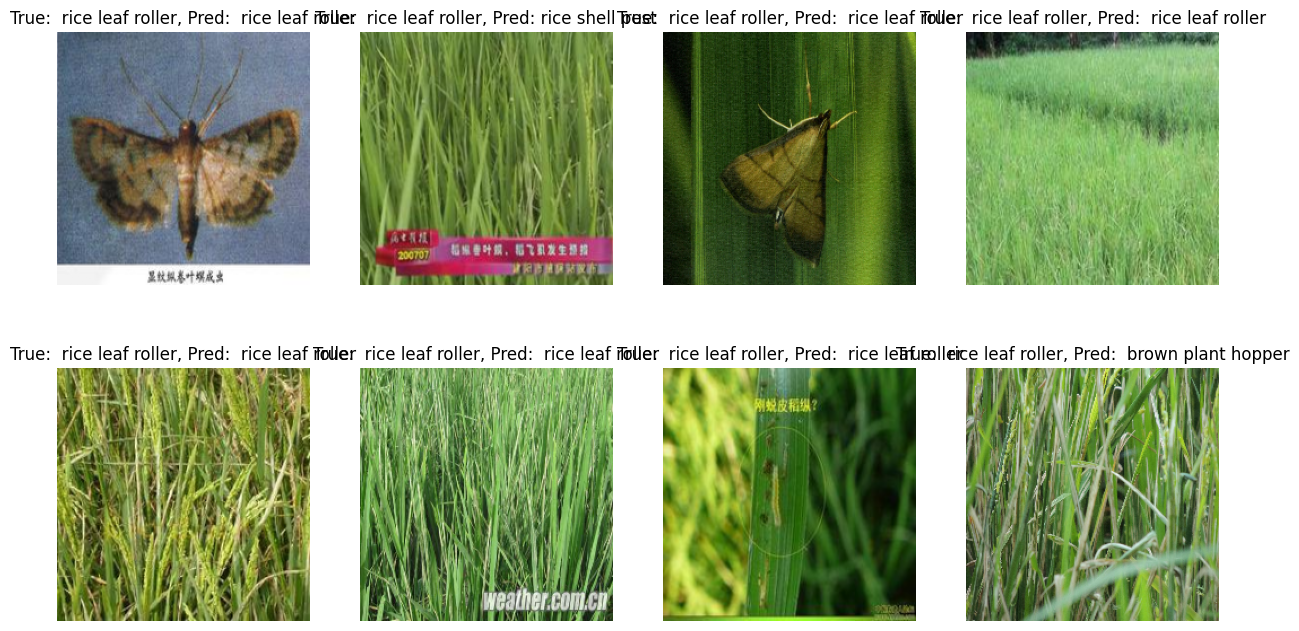

In [10]:


import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.models import vit_b_16
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import cv2

# Paths
TRAIN_DIR = "../input/ip02-dataset/classification/train"
TEST_DIR = "../input/ip02-dataset/classification/test"
VAL_DIR = "../input/ip02-dataset/classification/val"
CLASS_FILE = "../input/ip02-dataset/classes.txt"

# Hyperparameters
LR = 2e-5
BATCH_SIZE = 8
EPOCHS = 10
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Helper to calculate class weights
def calculate_class_weights(labels, num_classes):
    class_counts = np.bincount(labels, minlength=num_classes)
    class_weights = 1.0 / (class_counts + 1e-8)
    class_weights = class_weights / class_weights.sum()
    return torch.tensor(class_weights, dtype=torch.float32).to(DEVICE)


# Dataset class
class InsectDataset(Dataset):
    def __init__(self, image, image_dir, transforms=None):
        self.image_info = image
        self.transforms = transforms
        self.imgdir = image_dir

    def __len__(self):
        return self.image_info.shape[0]

    def __getitem__(self, index):
        image_info = self.image_info[index]
        image = cv2.imread(os.path.join(self.imgdir, str(image_info[1]), image_info[0]), cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0
        if self.transforms:
            image = self.transforms(image=image)["image"]
        label = image_info[1]

        # Return the original tensors directly without re-wrapping
        return image, label


# Data augmentations
def train_transform():
    return A.Compose([
        A.HorizontalFlip(),
        A.RandomBrightnessContrast(),
        A.Resize(224, 224),
        ToTensorV2()
    ])

def valid_transform():
    return A.Compose([
        A.Resize(224, 224),
        ToTensorV2()
    ])

# Model definition
class InsectModel(nn.Module):
    def __init__(self, num_classes):
        super(InsectModel, self).__init__()
        self.model = vit_b_16(weights="IMAGENET1K_V1")
        self.model.heads.head = nn.Linear(self.model.heads.head.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Training function
def train_fn(data_loader, model, criterion, optimizer, device):
    model.train()
    train_loss, correct, total = 0.0, 0, 0
    tk0 = tqdm(data_loader, total=len(data_loader))
    for images, labels in tk0:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        tk0.set_postfix(loss=train_loss / total, accuracy=correct / total)
    return train_loss / total, correct / total

# Evaluation function
def eval_fn(data_loader, model, criterion, device):
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    all_labels, all_preds = [], []
    with torch.no_grad():
        for images, labels in tqdm(data_loader, total=len(data_loader)):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    return val_loss / total, correct / total, all_labels, all_preds

# Metrics calculation
def calculate_metrics(y_true, y_pred, num_classes):
    precision = precision_score(y_true, y_pred, average="macro", zero_division=1)
    recall = recall_score(y_true, y_pred, average="macro", zero_division=1)
    f1 = f1_score(y_true, y_pred, average="macro", zero_division=1)
    report = classification_report(y_true, y_pred, target_names=[f"Class {i}" for i in range(num_classes)], zero_division=1)
    return precision, recall, f1, report

# Plot performance curves
def plot_curves(train_metrics, val_metrics, metric_name):
    plt.figure(figsize=(10, 5))
    plt.plot(train_metrics, label=f"Train {metric_name}")
    plt.plot(val_metrics, label=f"Validation {metric_name}")
    plt.title(f"{metric_name} Curve")
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.legend()
    plt.show()

# Visualization of predictions
def visualize_predictions(model, data_loader, classes, device):
    model.eval()
    images, labels = next(iter(data_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    fig, axs = plt.subplots(2, 4, figsize=(15, 8))
    for i, ax in enumerate(axs.ravel()):
        img = images[i].cpu().permute(1, 2, 0).numpy()
        ax.imshow(img)
        ax.set_title(f"True: {classes[labels[i].item()]}, Pred: {classes[preds[i].item()]}")
        ax.axis("off")
    plt.show()

# Main training loop
def run():
    # Load class names
    with open(CLASS_FILE) as f:
        class_names = [line.strip().split(" ", 1)[1] for line in f.readlines()]

    # Load datasets
    train_df = pd.read_csv("../input/ip02-dataset/train.txt", sep=" ", header=None)
    val_df = pd.read_csv("../input/ip02-dataset/val.txt", sep=" ", header=None)
    train_df.columns = ["image_path", "label"]
    val_df.columns = ["image_path", "label"]

    train_dataset = InsectDataset(train_df.values, TRAIN_DIR, train_transform())
    val_dataset = InsectDataset(val_df.values, VAL_DIR, valid_transform())
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

    # Model, loss, optimizer
    model = InsectModel(num_classes=len(class_names)).to(DEVICE)
    class_weights = calculate_class_weights(train_df["label"].values, len(class_names))
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

    # Metrics storage
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(EPOCHS):
        print(f"Epoch {epoch + 1}/{EPOCHS}")
        train_loss, train_acc = train_fn(train_loader, model, criterion, optimizer, DEVICE)
        val_loss, val_acc, y_true, y_pred = eval_fn(val_loader, model, criterion, DEVICE)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Plot curves
    plot_curves(train_losses, val_losses, "Loss")
    plot_curves(train_accuracies, val_accuracies, "Accuracy")

    # Calculate final metrics
    precision, recall, f1, report = calculate_metrics(y_true, y_pred, len(class_names))
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(report)

    # Save the model
    torch.save(model.state_dict(), "best_model.pth")

    # Visualize predictions
    visualize_predictions(model, val_loader, class_names, DEVICE)

# Execute training
run()




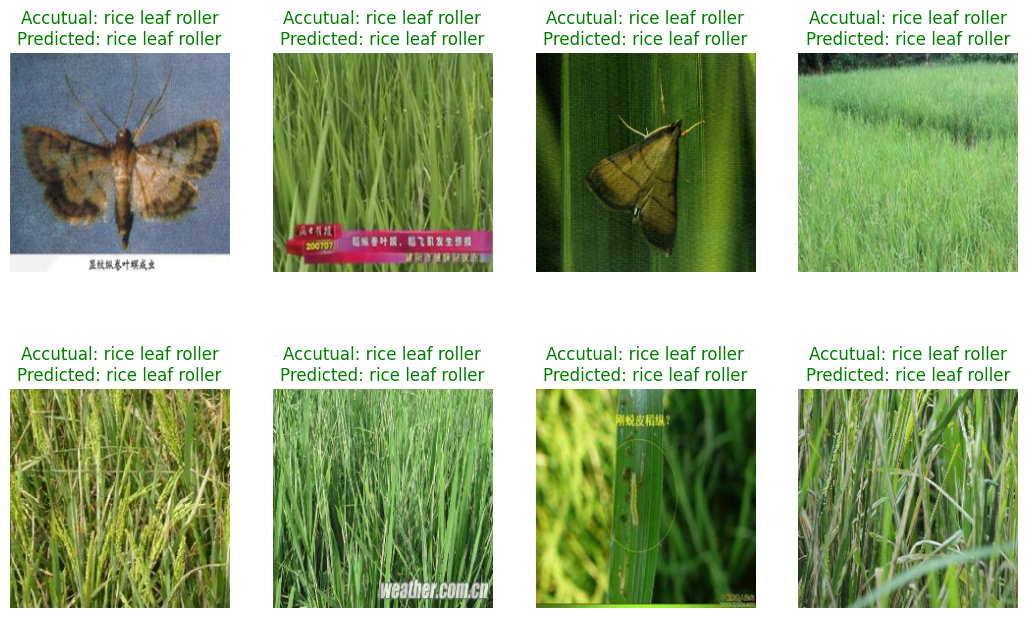

In [10]:


model = InsectModel(num_classes=102)
model.load_state_dict(torch.load("./vit_best.pth", weights_only=True))
images, labels = next(iter(val_data_loader))
preds = model(images).softmax(1).argmax(1)

fig, axs = plt.subplots(2,4,figsize=(13,8))
[ax.imshow(image.permute((1,2,0))) for image,ax in zip(images,axs.ravel())]
[ax.set_title("\n".join(wrap(f'Accutual: {classes.name[label.item()]} Predicted: {classes.name[pred.item()]}',30)),color = 'g' if label.item()==pred.item() else 'r') for label,pred,ax in zip(labels,preds,axs.ravel())]
[ax.set_axis_off() for ax in axs.ravel()]
plt.show()






# Mask R-CNN Implementation



In [4]:






import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights
from torchvision.transforms import functional as F
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from tqdm import tqdm
import torchvision


# Paths
TRAIN_DIR = "../input/ip02-dataset/classification/train"
VAL_DIR = "../input/ip02-dataset/classification/val"
CLASS_FILE = "../input/ip02-dataset/classes.txt"

# Step 1: Dynamically Build Dataset
def build_dataset(image_dir):
    data = []
    for label in os.listdir(image_dir):  # Iterate through label directories
        label_path = os.path.join(image_dir, label)
        if not os.path.isdir(label_path):
            continue
        for image_file in os.listdir(label_path):  # Iterate through image files
            if image_file.endswith(('.jpg', '.png', '.jpeg')):  # Ensure valid image formats
                data.append({"image_path": os.path.join(label, image_file), "label": int(label)})
    return pd.DataFrame(data)

# Dynamically generate datasets
train_df = build_dataset(TRAIN_DIR)
val_df = build_dataset(VAL_DIR)

print(f"Training dataset size: {len(train_df)}")
print(f"Validation dataset size: {len(val_df)}")

# Step 2: Dataset Class
class MaskRCNNDataset(Dataset):
    def __init__(self, image_data, image_dir, transforms=None):
        self.image_data = image_data
        self.image_dir = image_dir
        self.transforms = transforms

    def __len__(self):
        return len(self.image_data)

    def __getitem__(self, idx):
        row = self.image_data.iloc[idx]
        image_path = os.path.join(self.image_dir, row["image_path"])

        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image not found: {image_path}")

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        height, width, _ = image.shape
        boxes = [[0, 0, width, height]]
        labels = [row["label"] + 1]
        masks = torch.ones((1, height, width), dtype=torch.uint8)  # Full image as mask

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels, "masks": masks}

        if self.transforms:
            transformed = self.transforms(image=image)
            image = transformed["image"].float()  # Ensure the image is a float32 tensor
        else:
            image = F.to_tensor(image).float()

        return image, target

# Step 3: Transformations
transform = A.Compose([
    A.Resize(512, 512),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),  # Normalize for pretrained models
    ToTensorV2()  # Convert to PyTorch tensor
])

# Step 4: DataLoaders
train_dataset = MaskRCNNDataset(train_df, TRAIN_DIR, transforms=transform)
val_dataset = MaskRCNNDataset(val_df, VAL_DIR, transforms=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# Step 5: Model Setup
num_classes = len(os.listdir(TRAIN_DIR)) + 1  # Number of classes + background
weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
model = maskrcnn_resnet50_fpn(weights=weights)

# Replace the box predictor to match the number of classes
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(
    in_features,
    num_classes
)

# Replace the mask predictor to match the number of classes
hidden_layer = model.roi_heads.mask_predictor.conv5_mask.in_channels
model.roi_heads.mask_predictor = torchvision.models.detection.mask_rcnn.MaskRCNNPredictor(
    hidden_layer,
    hidden_layer,
    num_classes
)

model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))


# Step 6: Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Step 7: Training Function
def train_one_epoch(model, data_loader, optimizer, device):
    model.train()
    total_loss = 0
    for images, targets in tqdm(data_loader):
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()

    return total_loss / len(data_loader)

# Step 8: Training Loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(3):  # Adjust the number of epochs as needed
    print(f"Epoch {epoch + 1}/3")
    train_loss = train_one_epoch(model, train_loader, optimizer, device)
    print(f"Train Loss: {train_loss:.4f}")

# Step 9: Save Model
torch.save(model.state_dict(), 'mask_rcnn_model.pth')
 








Training dataset size: 45095
Validation dataset size: 7508
Epoch 1/3


100%|██████████| 5637/5637 [2:53:23<00:00,  1.85s/it]  


Train Loss: 0.5223
Epoch 2/3


100%|██████████| 5637/5637 [2:47:36<00:00,  1.78s/it]  


Train Loss: 0.3838
Epoch 3/3


100%|██████████| 5637/5637 [2:48:05<00:00,  1.79s/it]  


Train Loss: 0.3451


In [7]:
precision, recall, iou = evaluate_model(model, val_loader, device)
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, IoU: {iou:.4f}")


100%|██████████| 939/939 [13:45<00:00,  1.14it/s]

Precision: 0.2999, Recall: 0.8823, IoU: 0.8181
